In [50]:
import os
import numpy as np
import matplotlib.pyplot as plt
import h5py
import scipy.stats
import pickle as pk
from tqdm import tqdm

In [3]:
hdf5=h5py.File('/project/projectdirs/polar/data/largepatch_reanalysis/largepatch_planck_sim_set/lowell_4_20210328/final_spectra_pack_unblind.hdf5','r' )

In [5]:
bins = hdf5['noise_fullcross/polarbearxpolarbear/bins'][1:-2]
binsbmid = np.mean(bins, axis=1)
dofbin=binsbmid*50*2
binsl = hdf5['signal_fullcross/tt/binsl'][:]
binslmid = hdf5['signal_fullcross/tt/binslmid'][:]
C2Db = binsbmid * (binsbmid + 1) / (2 * np.pi)
D2Cb = 1. / C2Db
C2Dl = binslmid * (binslmid + 1) / (2 * np.pi)
D2Cl = 1. / C2Dl

In [119]:
DsBB_cmb = hdf5['signal_fullcross/bb']['theorycb'][1:-2] * 1e-12
DlBB_cmb = hdf5['signal_fullcross/bb']['theorycl'][:] * 1e-12
DlBB_dust = 9.e-3*(binslmid/80)**(-0.6) * 1e-12
DsBB_dust = np.dot(hdf5['signal_fullcross/bb']['bpwf'][1:-2],DlBB_dust)
DsBB = DsBB_cmb + DsBB_dust
DlBB = DlBB_cmb + DlBB_dust
DsBB_sim = hdf5['signal_fullcross/bb']['Cb'][:,1:-2].mean(axis=0)+DsBB_dust

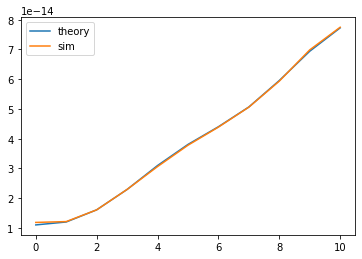

In [14]:
plt.plot(DsBB,label='theory')
plt.plot(DsBB_sim,label='sim')
plt.legend()

In [15]:
DnP143xP143BB_bias = hdf5['noise_fullcross/planck_143xplanck_143/bb']['Cb'][:,1:-2].mean(axis=0)

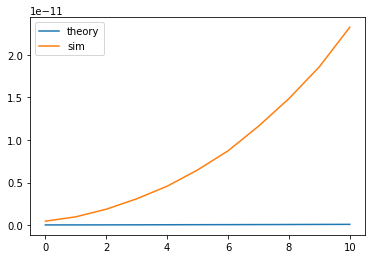

In [16]:
plt.plot(DsBB,label='theory')
plt.plot(DsBB_sim+DnP143xP143BB_bias,label='sim')
plt.legend()

In [17]:
"polar/sum_r0p00_spectra_fid_pb_fakeauto/sim000/"

'polar/sum_r0p00_spectra_fid_pb_fakeauto/sim000/'

In [18]:
def make_filename(exp1,exp2):
    if exp1 == exp2:
        return exp1
    else:
        if exp1 == "pb":
            return f"{exp2}_{exp1}"
        else:
            return f"{exp1}_{exp2}"

def make_keyname(exp1,exp2):
    exp1 = 'polarbear' if exp1 == 'pb' else exp1
    exp2 = 'polarbear' if exp2 == 'pb' else exp2
    
    if exp1 == 'polarbear':
        return f"{exp2}x{exp1}"
    else:
        return f"{exp1}x{exp2}"

In [19]:
spectra_keys = ['tt', 'ee', 'bb', 'te', 'tb', 'eb']
freq_name = ['planck_143','pb', 'planck_217','planck_353']

In [123]:
def dump_spectra(hdf5,exp1,exp2,sim):
    name = make_filename(exp1,exp2)
    foldername = os.path.join("polar/sum_r0p00_spectra_fid_pb_fakeauto/",f"sim{sim:03}",name)
    os.makedirs(foldername,exist_ok=True)
    spectra = {}
    spectra['bins'] = hdf5['signal_fullcross']['bins'][:].flatten()
    for keys in spectra_keys:
        dust = 9.e-3*(binslmid/80)**(-0.6)* 1e-12
        Ds_dust = np.dot(hdf5['signal_fullcross/bb']['bpwf'][:],dust)
        spectra[keys] = {}
        signal_key = f"signal_fullcross/bb"
        noise_key = f"noise_fullcross/{make_keyname(exp1,exp2)}/{keys}"
        spectra[keys]['Cb'] = hdf5[signal_key]['Cb'][sim,:] + hdf5[noise_key]['Cb'][sim,:] +Ds_dust
    filename = os.path.join(foldername,'allspec.pkl')
    #print(f"writing {filename}")
    pk.dump(spectra,open(filename,'wb'))

In [124]:
def dump_sim(sim):
    for i, exp1 in enumerate(freq_name):
        for j, exp2 in enumerate(freq_name):
            if i <= j:
                dump_spectra(hdf5,exp1,exp2,sim)

In [130]:
for i in tqdm(range(96)):
    dump_sim(0)

100%|██████████| 96/96 [00:08<00:00, 11.20it/s]


In [102]:
hdf5['noise_fullcross/planck_143xplanck_217/bb']['Cb'][0]

array([-2.43602375e-14,  1.00070650e-13, -7.58984363e-14, -2.67457032e-13,
        4.00639637e-13,  2.61129592e-13, -5.93581288e-13, -3.35139885e-13,
        1.93249518e-13, -1.79762104e-12, -3.91254614e-13, -1.39545444e-12,
       -1.33960278e-12,  4.87509478e-12])

In [103]:
hdf5['noise_fullcross/planck_143xplanck_217/bb']['Cb'][0,:]

array([-2.43602375e-14,  1.00070650e-13, -7.58984363e-14, -2.67457032e-13,
        4.00639637e-13,  2.61129592e-13, -5.93581288e-13, -3.35139885e-13,
        1.93249518e-13, -1.79762104e-12, -3.91254614e-13, -1.39545444e-12,
       -1.33960278e-12,  4.87509478e-12])

In [104]:
import matplotlib.pyplot as plt

In [134]:
planck_143 = pk.load(open("polar/sum_r0p00_spectra_fid_pb_fakeauto/sim003/planck_143/allspec.pkl", 'rb'))

In [132]:
real_planck = pk.load(open("polar/real_spectra_abscal_pb_fakeauto/planck_143/allspec.pkl",'rb'))

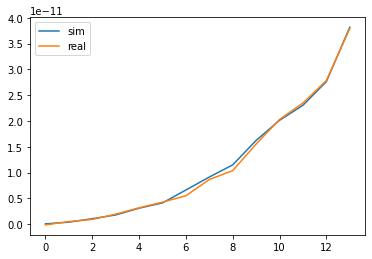

In [135]:
plt.plot(planck_143['bb']['Cb'],label='sim')
plt.plot(real_planck['bb']['Cb'],label='real')
plt.legend()

In [122]:
len(DsBB)

11